Dataset available on Kaggle
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualise as viz
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

myseed = 3836

In [2]:
train_path = 'extracted/train.csv'
test_path = 'extracted/test.csv'
df_train = pd.read_csv(train_path)
print('training dataset loaded.')
df_test = pd.read_csv(test_path)
print('testing dataset loaded')
# print(f'{len(df_train.columns)} Columns available \n', df_train.columns)
print('Details of each feature could be found in data_description.txt')
train_size, test_size = df_train.shape[0], df_test.shape[0]
df_full = pd.concat((df_train, df_test), axis=0)  #.drop(['Id', 'SalePrice'], axis=1)
print('Combined the full dataset.',
      df_full.shape)  # We'll do data pre-processing to the whole dataset and split it later.

training dataset loaded.
testing dataset loaded
Details of each feature could be found in data_description.txt
Combined the full dataset. (2919, 81)


After plotting the correlation matrix we notice that there are some columns have positive relationship with others. We might want to keep only one of them to reduce the dimensions.
[1stFlrSF,LotFrontage], [YearBuild,GarageYrBlt], [GrLivArea,TotRmsAbvGrd]


D:\study\2023 Sem B\MATH 3836\visualise.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap='coolwarm', square=True)


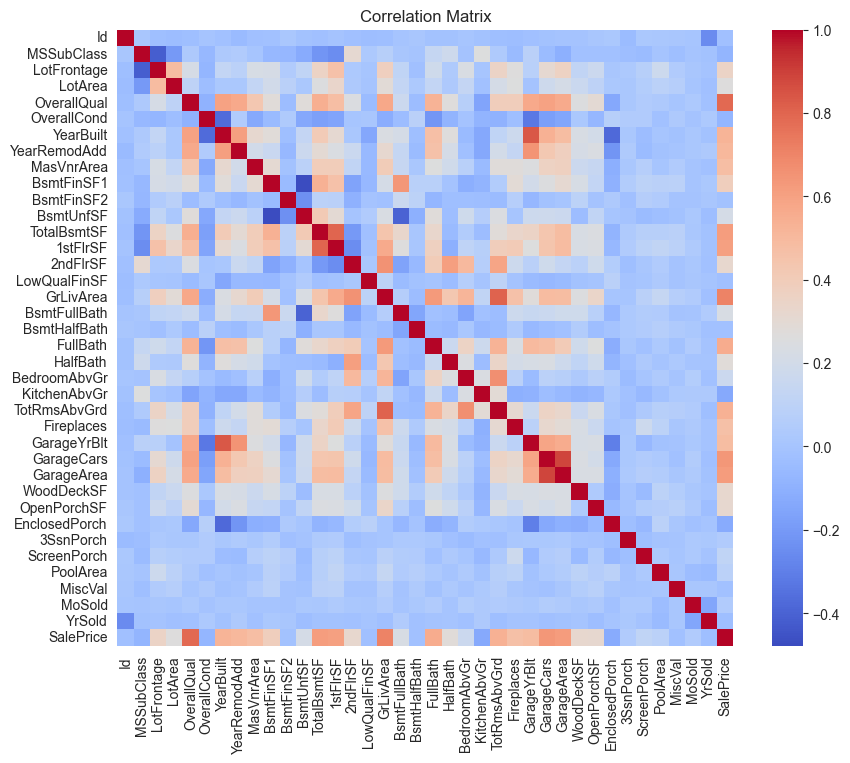

corr
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64


C:\Users\yip\AppData\Local\Temp\ipykernel_3620\1696908301.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('corr\n',df_full.corr().SalePrice.abs().loc[lambda x:x>0.3].sort_values(ascending=False))


In [3]:
viz.heatmap(df_full)
print('corr\n', df_full.corr().SalePrice.abs().loc[lambda x: x > 0.3].sort_values(ascending=False))

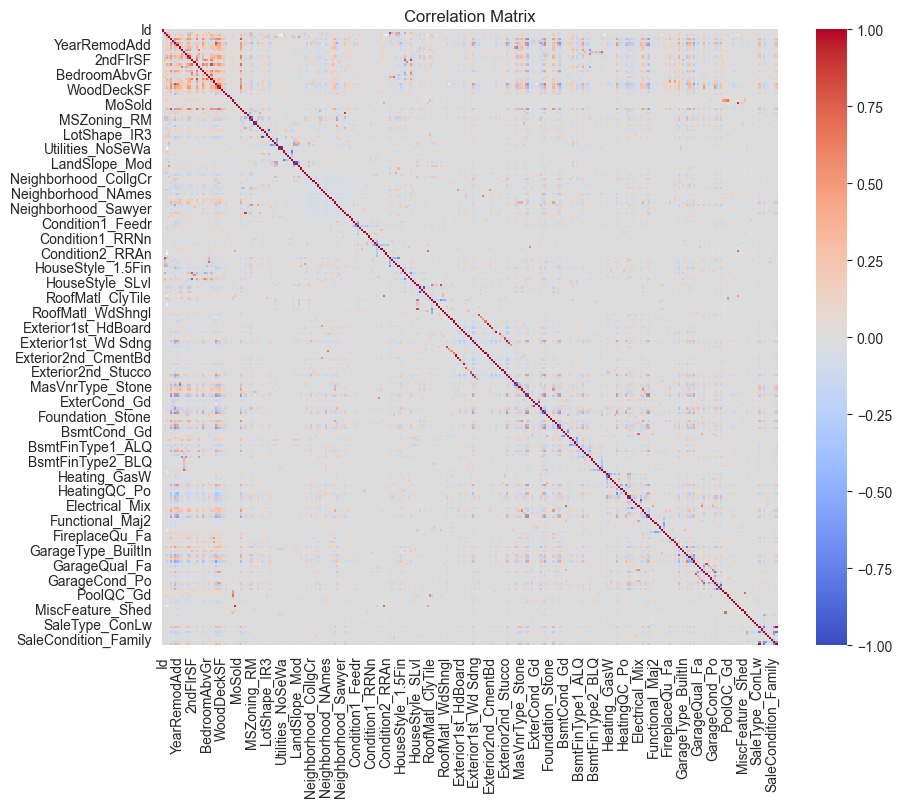

corr
 SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
ExterQual_TA             0.589044
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
KitchenQual_TA           0.519298
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
GarageYrBlt              0.486362
MasVnrArea               0.477493
Fireplaces               0.466929
ExterQual_Gd             0.452466
BsmtQual_TA              0.452394
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
GarageFinish_Unf         0.410608
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
MasVnrType_None          0.374468
SaleType

In [4]:
# Try showing the corr() after one-hot, however it's hard to see the importance in a heatmap as the dimension after one-hot encoding is too large
df_train_onehot = pd.get_dummies(df_train)
viz.heatmap(df_train_onehot)
print('corr\n', df_train_onehot.corr().SalePrice.abs().loc[lambda x: x > 0.3].sort_values(ascending=False))

After considering the categorical data, we noticed that
ExterQual_TA, BsmtQual_Ex, KitchenQual_TA, KitchenQual_Ex
have relatively positive relationship with the saleprice

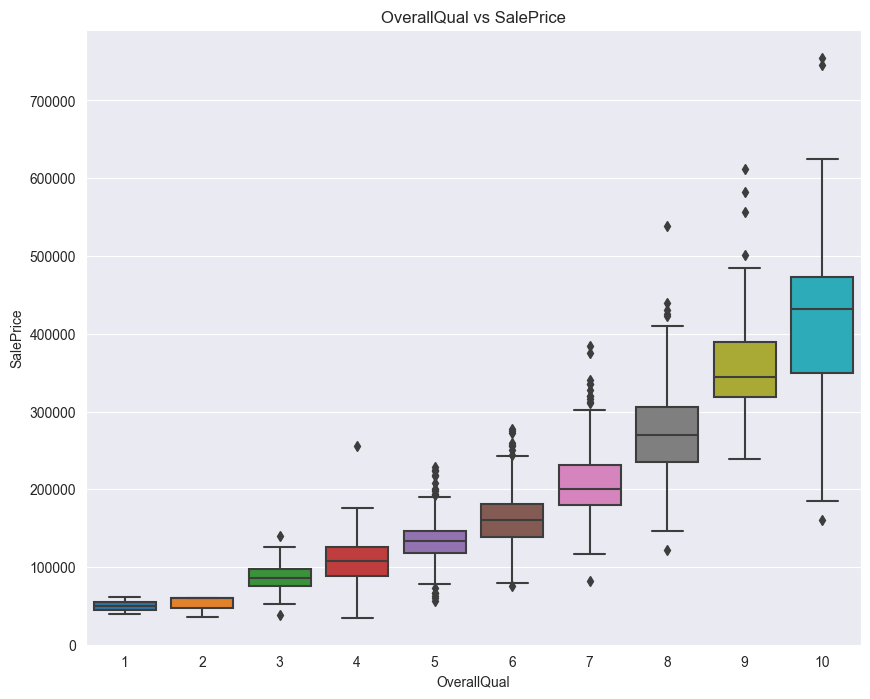

In [5]:
# The mean saleprice increase with the overall quality of property
viz.box_plot(df_train_onehot, 'OverallQual', 'SalePrice')

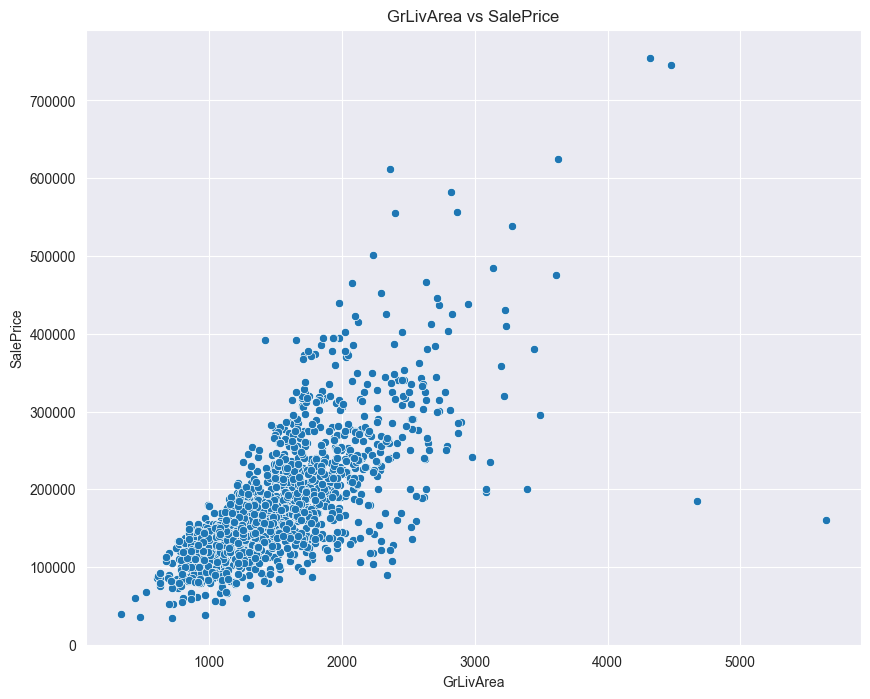

In [6]:
# A linear relationship could be observed, a few outliers are observed
viz.scatter_plot(df_train_onehot, 'GrLivArea', 'SalePrice')

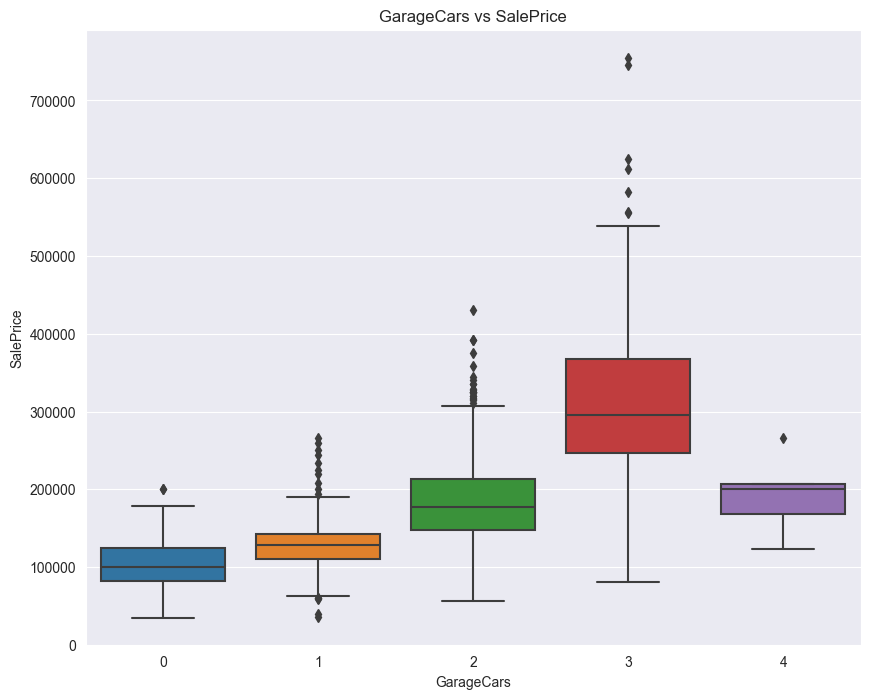

In [7]:
viz.box_plot(df_train_onehot, 'GarageCars', 'SalePrice')

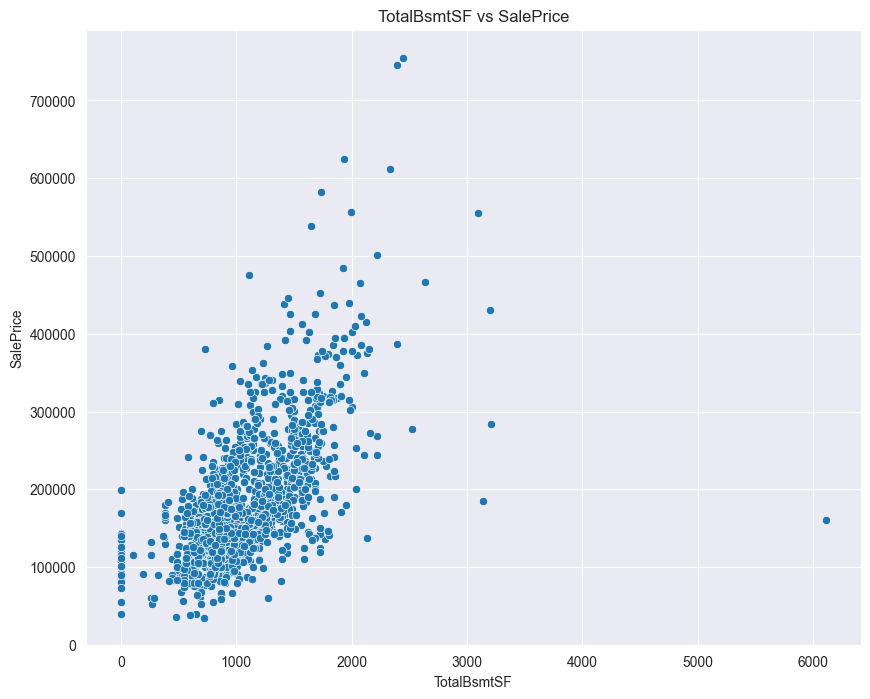

In [8]:
# 1 outlier is detected
viz.scatter_plot(df_train_onehot, 'TotalBsmtSF', 'SalePrice')

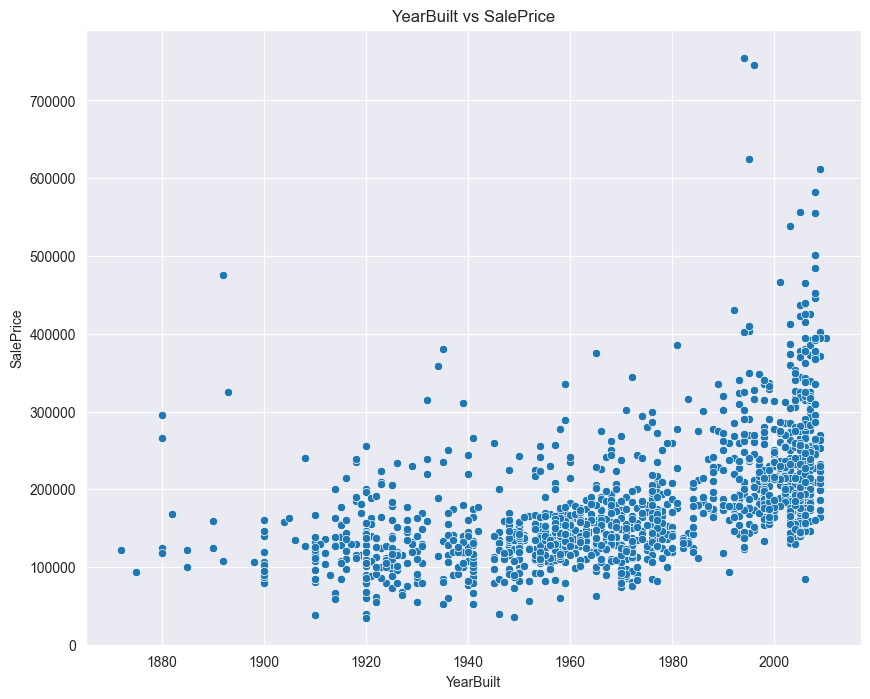

In [9]:
# New property tends to have a higher sale price
viz.scatter_plot(df_train_onehot, 'YearBuilt', 'SalePrice')

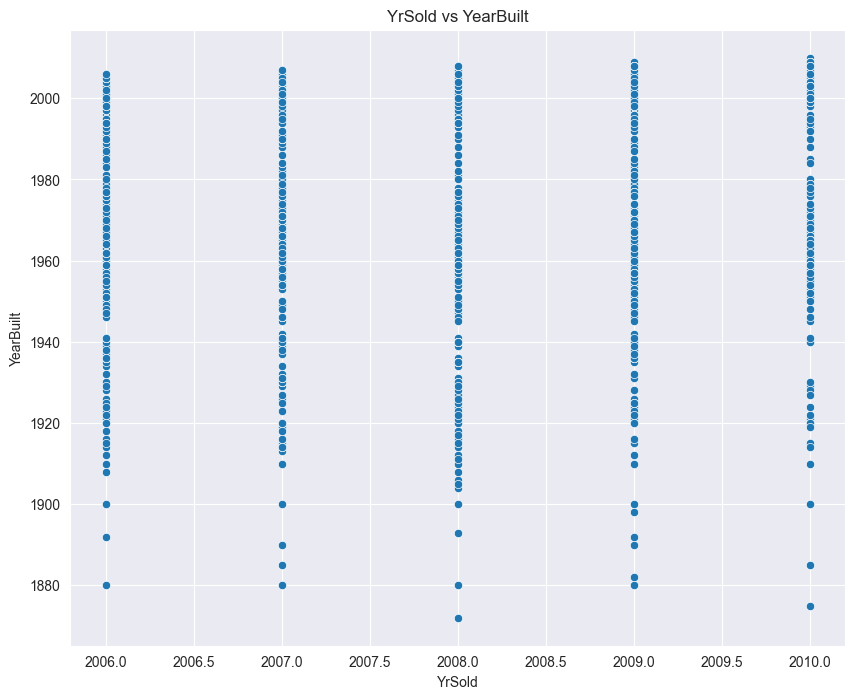

In [10]:
# YrSold and YearBuild is uniformly distributed
viz.scatter_plot(df_train_onehot, 'YrSold', 'YearBuilt')

# Data-Preprocessing

In [11]:
def get_importance(target):
    print(df_train.corr().SalePrice.abs().loc[target])


# Check null values
print(df_full.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False))
na_cols = list(
    df_full.isnull().sum().loc[lambda x: (x > 0) & (x.index != 'SalePrice') & (x.index != 'MasVnrArea')].index)
print(na_cols)
'''
PoolQC          NA = No Pool
MiscFeature     NA = No Miscellaneous feature
Alley           NA = No alley access
Fence           NA = No Fence
FireplaceQu     NA = No Fireplace
LotFrontage     Can remove column
GarageType      Can remove column
GarageYrBlt     Can remove column
GarageFinish    Can remove column
GarageQual      Can remove column
GarageCond      Can remove column
BsmtExposure    Can remove column
BsmtFinType2    Can remove column
BsmtFinType1    Can remove column
BsmtCond        Can remove column
BsmtQual        Can remove column
MasVnrArea      replace with 0
MasVnrType      Can remove column
Electrical      drop NA
'''

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 

'\nPoolQC          NA = No Pool\nMiscFeature     NA = No Miscellaneous feature\nAlley           NA = No alley access\nFence           NA = No Fence\nFireplaceQu     NA = No Fireplace\nLotFrontage     Can remove column\nGarageType      Can remove column\nGarageYrBlt     Can remove column\nGarageFinish    Can remove column\nGarageQual      Can remove column\nGarageCond      Can remove column\nBsmtExposure    Can remove column\nBsmtFinType2    Can remove column\nBsmtFinType1    Can remove column\nBsmtCond        Can remove column\nBsmtQual        Can remove column\nMasVnrArea      replace with 0\nMasVnrType      Can remove column\nElectrical      drop NA\n'

In [12]:
df_full

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [13]:
to_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
           'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond',
           'BsmtQual', 'MasVnrType']
df_train.drop(columns=to_drop, inplace=True, errors='ignore')
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train = df_train.drop(df_train.loc[df_train.Electrical.isnull()].index)
df_train.drop(df_train[(df_train.GrLivArea > 4000) & (df_train.SalePrice < 200000)].index, inplace=True)

# We'll do the same process on test set
df_test.drop(columns=to_drop, inplace=True, errors='ignore')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test = df_test.drop(df_test.loc[df_test.Electrical.isnull()].index)

df_full.drop(columns=na_cols, inplace=True, errors='ignore')
df_full['MasVnrArea'] = df_full['MasVnrArea'].fillna(0)
df_full.SalePrice = np.log1p(df_full.SalePrice)


Text(0.5, 1.0, 'After log transformation')

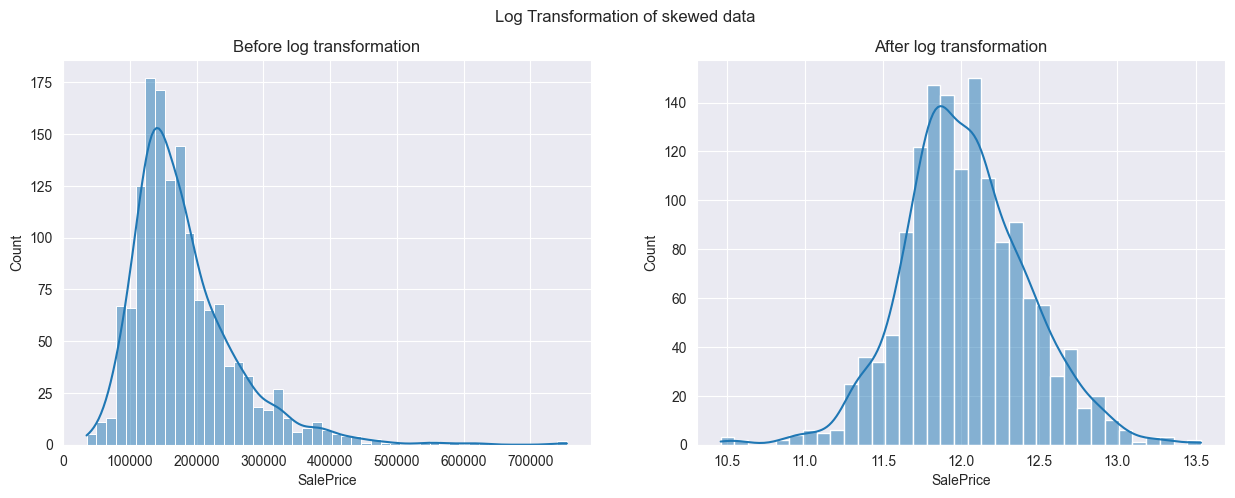

In [14]:
# As we found that the saleprice is right-skewed, we'll need to apply log transformation on skewed data
import seaborn as sns

df_train_log = df_train.copy()
df_train_log.SalePrice = np.log1p(df_train_log.SalePrice)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Log Transformation of skewed data')
sns.histplot(df_train, x='SalePrice', kde=True, ax=axes[0])
sns.histplot(df_train_log, x='SalePrice', kde=True, ax=axes[1])
axes[0].set_title("Before log transformation");
axes[1].set_title("After log transformation")

In [15]:
# We check further the skewness of other columns and apply the log transformation
from scipy.stats import skew

num_cols = df_full.dtypes[df_full.dtypes != 'object'].index
skewed_cols = df_full[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_cols = skewed_cols[abs(skewed_cols) > 0.5]
for col in skewed_cols.index:
    df_full[col] = np.log1p(df_full[col])
    # df_test[col] = np.log1p(df_test[col])
    # df_train_log[col] = np.log1p(df_train_log[col])
df_full

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,4.110874,9.042040,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008,Normal,12.247699
1,2,3.044522,9.169623,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007,Normal,12.109016
2,3,4.110874,9.328212,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008,Normal,12.317171
3,4,4.262680,9.164401,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006,Abnorml,11.849405
4,5,4.110874,9.565284,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,7.568896,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,6,2006,Normal,NaN
1455,2916,5.081404,7.546974,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,3.218876,0.000000,0.0,0.0,0.0,0.000000,4,2006,Abnorml,NaN
1456,2917,3.044522,9.903538,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,9,2006,Abnorml,NaN
1457,2918,4.454347,9.253591,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,3.496508,0.000000,0.0,0.0,0.0,6.552508,7,2006,Normal,NaN


In [16]:
# So far we have already cleaned the full dataset
# Let's get the train and test dataset first from the cleaned full dataset
n = pd.read_csv(train_path).shape[0]
df_full_final = pd.get_dummies(df_full)
df_train = df_full_final.iloc[:n, :]
df_test = df_full_final.iloc[n:, :]

print(df_train.shape, df_test.shape)

(1460, 152) (1459, 152)


In [17]:
# Next we can split the training dataset into train & validation set
X_train, X_val, Y_train, Y_val = train_test_split(df_train.drop(columns='SalePrice'), df_train.SalePrice, test_size=0.2,
                                                  random_state=myseed)
X_test = df_test.drop(columns='SalePrice')

# We'll train the model using train set
linreg = LinearRegression().fit(X_train, Y_train)
# We can evaluate the model by using R^2 and RMSE
print(f"The R^2 of the model on training set is {linreg.score(X_train, Y_train)},"
      f"\nThe RMSE of the model on training set is {np.sqrt(mean_squared_error(Y_train, linreg.predict(X_train)))}.")
print(f"The R^2 of the model on validation set is {linreg.score(X_val, Y_val)},"
      f"\nThe RMSE of the model on validation set is {np.sqrt(mean_squared_error(Y_val, linreg.predict(X_val)))}.")

The R^2 of the model on training set is 0.9219041135798945,
The RMSE of the model on training set is 0.11319942359565502.
The R^2 of the model on validation set is 0.8751290715105751,
The RMSE of the model on validation set is 0.13220137822063416.


In [18]:
# Save a submission file to check RMSE score on Kaggle
pd.DataFrame({"Id": df_test.Id, "SalePrice": np.expm1(linreg.predict(X_test))}).to_csv("my_submission.csv", index=False)

# Let's try to reduce the dimension of dataset

# PCA & KMeans

In [31]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,9.042040,7,1.791759,7.602900,2003,5.283204,6.753438,6.751101,...,1,0,0,1,0,0,0,0,1,0
1,2,3.044522,9.169623,6,2.197225,7.589336,1976,0.000000,7.141245,0.000000,...,1,0,0,1,0,0,0,0,1,0
2,3,4.110874,9.328212,7,1.791759,7.601902,2002,5.093750,6.825460,6.765039,...,1,0,0,1,0,0,0,0,1,0
3,4,4.262680,9.164401,7,1.791759,7.557995,1970,0.000000,6.869014,6.629363,...,1,0,0,1,1,0,0,0,0,0
4,5,4.110874,9.565284,8,1.791759,7.601402,2000,5.860786,7.044033,6.960348,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,8.976894,6,1.791759,7.600902,2000,0.000000,6.860664,6.543912,...,1,0,0,1,0,0,0,0,1,0
1456,1457,3.044522,9.486152,6,1.945910,7.590347,1988,4.787492,7.637234,0.000000,...,1,0,0,1,0,0,0,0,1,0
1457,1458,4.262680,9.109746,7,2.302585,7.571474,2006,0.000000,7.080868,7.050123,...,1,0,0,1,0,0,0,0,1,0
1458,1459,3.044522,9.181735,5,1.945910,7.576097,1996,0.000000,6.983790,0.000000,...,1,0,0,1,0,0,0,0,1,0


D:\study\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.999976060127531


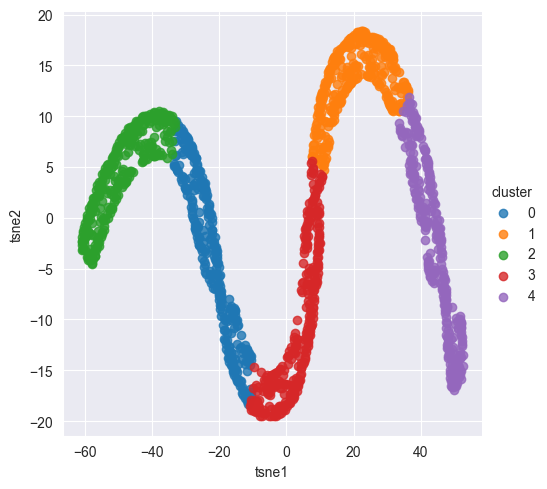

In [57]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=50, random_state=myseed)
tsne = model.fit_transform(df_train.drop("SalePrice", axis=1))

# We reduce the dimension to 20 using PCA, followed by a KMeans Clustering to get 5 clusters, and visualize the data in a 2d plane using TSNE
pca = PCA(n_components=20).fit(df_train.drop("SalePrice", axis=1))
pc = pca.transform(df_train.drop("SalePrice", axis=1))
kmeans = KMeans(n_clusters=5).fit(pc)
# Use fit_transform() to get the reduced dimension dataset

# Visualize the results
rr = pd.DataFrame({'tsne1': tsne[:, 0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=rr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [77]:
linreg2 = LinearRegression().fit(pc, df_train.SalePrice)
print(f"RMSE of train data is {np.sqrt(mean_squared_error(Y_train, linreg2.predict(pca.transform(X_train))))}")
print(f"RMSE of val data is {np.sqrt(mean_squared_error(Y_val, linreg2.predict(pca.transform(X_val))))}")

RMSE of train data is 0.17789632741907557
RMSE of val data is 0.1730057219639482


In [71]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1168, 151), (292, 151), (1168,), (292,))

In [24]:
# df_train = pd.read_csv(train_path)
# df_test = pd.read_csv(test_path)
#
# df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
# df_train = df_train.drop(df_train.loc[df_train.Electrical.isnull()].index)
# df_train.drop(df_train[(df_train.GrLivArea > 4000) & (df_train.SalePrice < 200000)].index, inplace=True)

((1460, 81), (1459, 80))